In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.fft import *
import matplotlib.style as style
%matplotlib inline
import os

In [7]:
# see total data
print(os.listdir('../data'))

['DJI_STO_20period_sma10.csv', 'DJI_modified_features - DJI.csv', 'DJI_modified_sma.csv', 'downjone5y.csv', 'dowjone1985_2019.csv', '.ipynb_checkpoints']


In [10]:
df = pd.read_csv('../data/dowjone1985_2019.csv')

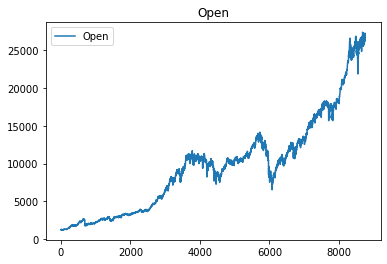

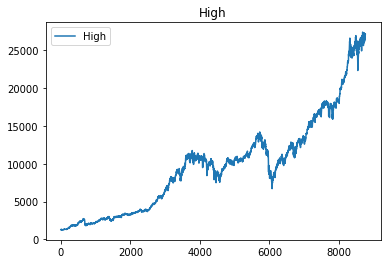

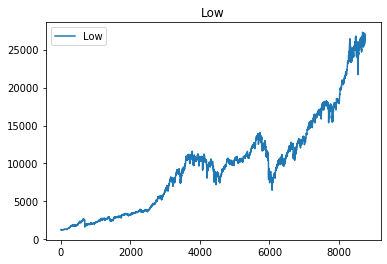

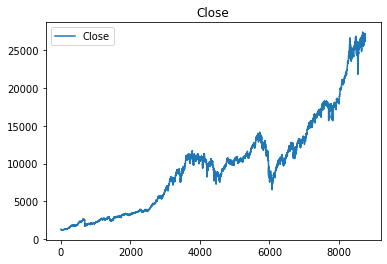

In [18]:
cols = ['Open', 'High', 'Low', 'Close']
for col in cols:
    df.plot(y=[col], title=col)

In [19]:
df_denoised = df.copy()

In [20]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)


In [24]:
for col in cols:
    denoised_data = df.groupby(['Date'])[col].apply(lambda x: filter_signal(x))
    print(denoised_data)
    list_denoised_data = list()
    for arr in denoised_data:
        for val in arr:
            list_denoised_data.append(val)
    df_denoised[col] = list_denoised_data

ValueError: Invalid number of FFT data points (0) specified.